In [25]:
import chess

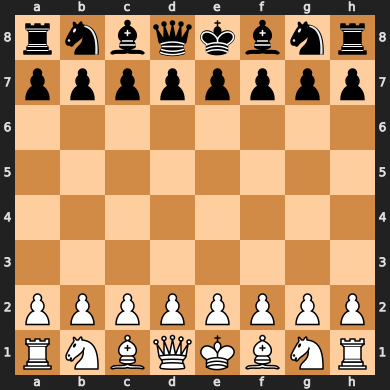

In [26]:
board=chess.Board()
board.reset()
board

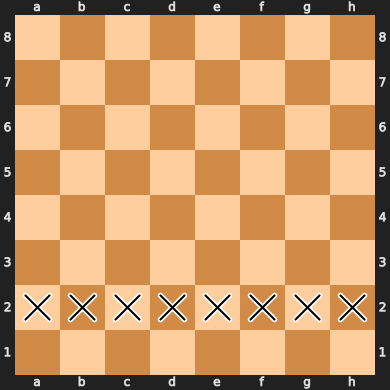

In [27]:
board.pieces(chess.PAWN, chess.WHITE)
#shows the position of pawns on current board state

**HEURISTIC OPTIMISATIONS**

we used two heuristic functions to calculate final evaluation score.

* material score 
* piece square table

In [28]:
def evaluate_board():
    if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
    if board.is_stalemate():
        return 0
    if board.is_insufficient_material():
        return 0
#if current turn is white(previous move was black) so it returns -9999.i.e.,black wins.
#else white wins returns 9999 .if its stalemate(draw) or insufficient information then return 0



#---------------------CALCULATING MATERIAL SCORE--------------------------------


# we assign scores(their valuability) and calculate material score based on number of pieces of each type.
# The material score is calculated by the summation of all respective piece’s weights 
# multiplied by the difference between the number of that respective piece between white and black.

    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))



    material_score = 100 * (wp - bp) + 310 * (wn - bn) + 320 * (wb - bb) + 500 * (wr - br) + 900 * (wq - bq)


#-------------------CALCULATING PIECE SQUARE VALUE------------------------------


# The individual pieces score is the sum of piece-square values of positions where the respective piece is present at that instance of the game.
# we subract white score - black score to get total individual score


    pawn_table =  [
               0,  0,  0,  0,  0,  0,  0,  0,
              50, 50, 50, 50, 50, 50, 50, 50,
              10, 10, 20, 30, 30, 20, 10, 10,
               5,  5, 10, 25, 25, 10,  5,  5,
               0,  0,  0, 20, 20,  0,  0,  0,
               5, -5,-10,  0,  0,-10, -5,  5,
               5, 10, 10,-20,-20, 10, 10,  5,
               0,  0,  0,  0,  0,  0,  0,  0
               ]


    knight_table = [
               -50,-40,-30,-30,-30,-30,-40,-50,
               -40,-20,  0,  0,  0,  0,-20,-40,
               -30,  0, 10, 15, 15, 10,  0,-30,
               -30,  5, 15, 20, 20, 15,  5,-30,
               -30,  0, 15, 20, 20, 15,  0,-30,
               -30,  5, 10, 15, 15, 10,  5,-30,
               -40,-20,  0,  5,  5,  0,-20,-40,
               -50,-40,-30,-30,-30,-30,-40,-50,
               ]


    bishop_table = [
               -20,-10,-10,-10,-10,-10,-10,-20,
               -10,  0,  0,  0,  0,  0,  0,-10,
               -10,  0,  5, 10, 10,  5,  0,-10,
               -10,  5,  5, 10, 10,  5,  5,-10,
               -10,  0, 10, 10, 10, 10,  0,-10,
               -10, 10, 10, 10, 10, 10, 10,-10,
               -10,  5,  0,  0,  0,  0,  5,-10,
               -20,-10,-10,-10,-10,-10,-10,-20
               ]


    rook_table = [
               0,  0,  0,  0,  0,  0,  0,  0,
               5, 10, 10, 10, 10, 10, 10,  5,
              -5,  0,  0,  0,  0,  0,  0, -5,
              -5,  0,  0,  0,  0,  0,  0, -5,
              -5,  0,  0,  0,  0,  0,  0, -5,
              -5,  0,  0,  0,  0,  0,  0, -5,
              -5,  0,  0,  0,  0,  0,  0, -5,
               0,  0,  0,  5,  5,  0,  0,  0
               ]


    queen_table = [
               -20,-10,-10, -5, -5,-10,-10,-20,
               -10,  0,  0,  0,  0,  0,  0,-10,
               -10,  0,  5,  5,  5,  5,  0,-10,
                -5,  0,  5,  5,  5,  5,  0, -5,
                 0,  0,  5,  5,  5,  5,  0, -5,
               -10,  5,  5,  5,  5,  5,  0,-10,
               -10,  0,  5,  0,  0,  0,  0,-10,
               -20,-10,-10, -5, -5,-10,-10,-20
               ]


    king_table = [
               -30,-40,-40,-50,-50,-40,-40,-30,
               -30,-40,-40,-50,-50,-40,-40,-30,
               -30,-40,-40,-50,-50,-40,-40,-30,
               -30,-40,-40,-50,-50,-40,-40,-30,
               -20,-30,-30,-40,-40,-30,-30,-20,
               -10,-20,-20,-20,-20,-20,-20,-10,
                20, 20,  0,  0,  0,  0, 20, 20,
                20, 30, 10,  0,  0, 10, 30, 20
                ]

    

    pawnsq = sum([pawn_table[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq = pawnsq + sum([-pawn_table[chess.square_mirror(i)]
                           for i in board.pieces(chess.PAWN, chess.BLACK)])
    knightsq = sum([knight_table[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knight_table[chess.square_mirror(i)]
                               for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bishopsq = sum([bishop_table[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq = bishopsq + sum([-bishop_table[chess.square_mirror(i)]
                               for i in board.pieces(chess.BISHOP, chess.BLACK)])
    rooksq = sum([rook_table[i] for i in board.pieces(chess.ROOK, chess.WHITE)])
    rooksq = rooksq + sum([-rook_table[chess.square_mirror(i)]
                           for i in board.pieces(chess.ROOK, chess.BLACK)])
    queensq = sum([queen_table[i] for i in board.pieces(chess.QUEEN, chess.WHITE)])
    queensq = queensq + sum([-queen_table[chess.square_mirror(i)]
                             for i in board.pieces(chess.QUEEN, chess.BLACK)])
    kingsq = sum([king_table[i] for i in board.pieces(chess.KING, chess.WHITE)])
    kingsq = kingsq + sum([-king_table[chess.square_mirror(i)]
                           for i in board.pieces(chess.KING, chess.BLACK)])
    

    pst_heuristic_score = pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq


#------------------CALCULATING TOTAL EVALUATION SCORE---------------------------


    utility= pst_heuristic_score + material_score

    if board.turn:
        return utility
    else:
        return -utility

#evaluation function (utility) is sum of individual scores and material scores for white and negate it for black.

**Algorithm**

we use negamax implementation of minimax algorithm with alpha beta pruning.negamax is a variation of minimax algorithm.Instead of using two separate subroutines for the Min player and the Max player, it passes on the negated score due to following mathematical relation.                   
max(a, b) == -min(-a, -b)

In [29]:


def negamax(alpha, beta, depthleft):
    bestscore = -9999
    if (depthleft == 0):
        return quiesce(alpha, beta)
    for move in board.legal_moves:
        board.push(move)
        score = -negamax(-beta, -alpha, depthleft - 1)
        board.pop()
        if (score >= beta):
            return score
        if (score > bestscore):
            bestscore = score
        if (score > alpha):
            alpha = score
    return bestscore

def quiesce(alpha, beta):   
    stand_pat = evaluate_board()
    if (stand_pat >= beta):
        return beta
    if (alpha < stand_pat):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            board.push(move)
            score = -quiesce(-beta, -alpha)
            board.pop()

            if (score >= beta):
                return beta
            if (score > alpha):
                alpha = score
    return alpha



**TESTING AI**

In [30]:
import chess.engine
import chess.svg
import chess.polyglot
from IPython.display import SVG
import chess.pgn

In [31]:
def selectmove(depth):
    try:
        move = chess.polyglot.MemoryMappedReader("/content/human.bin").weighted_choice(board).move

        return move
    except:
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            board.push(move)
            boardValue = -negamax(-beta, -alpha, depth - 1)
            if boardValue > bestValue:
                bestValue = boardValue
                bestMove = move
            if (boardValue > alpha):
                alpha = boardValue
            board.pop()
        return bestMove


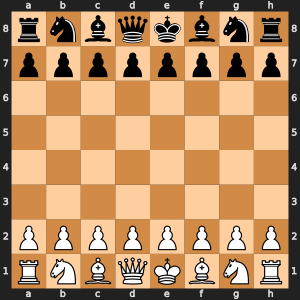

In [32]:
movehistory =[]
board = chess.Board()
SVG(chess.svg.board(board=board,size=300))

time required by AI to make each move selection is :  4.907073259353638 



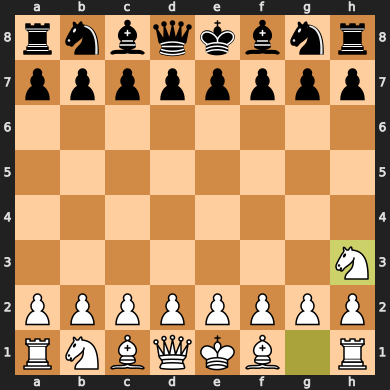

In [33]:
#computer move
import time
start=time.time()
mov = selectmove(5)
end=time.time()
board.push(mov)
print("time required by AI to make each move selection is : ",end-start,"\n")
board

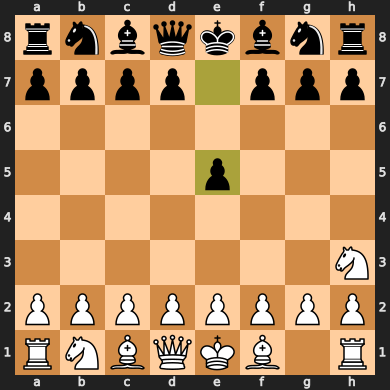

In [34]:
# human move
board.push_san("e5")
board

**AI vs AI**

In [35]:
board.reset()


1]



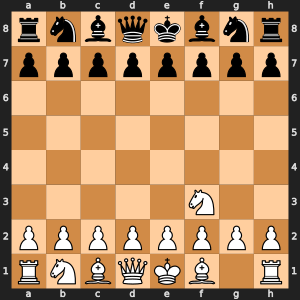

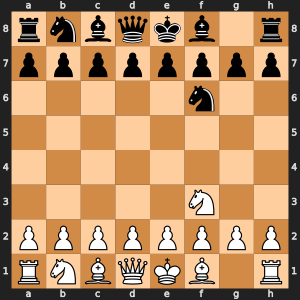


2]



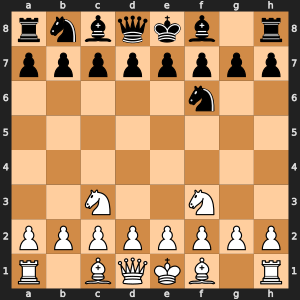

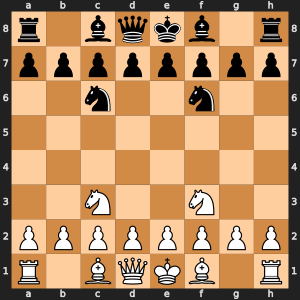


3]



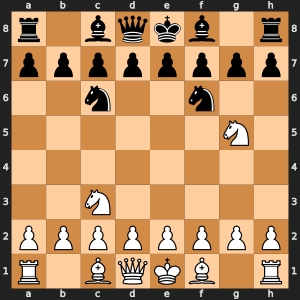

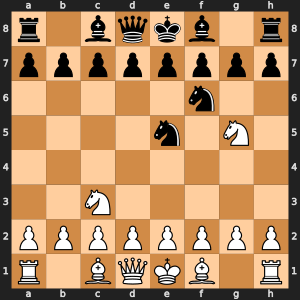


4]



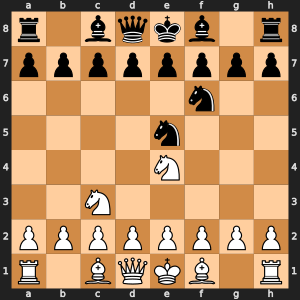

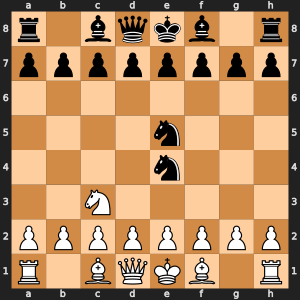


5]



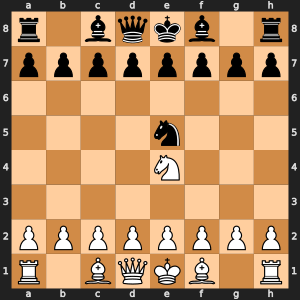

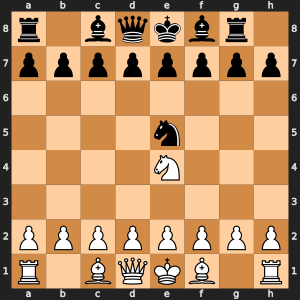


6]



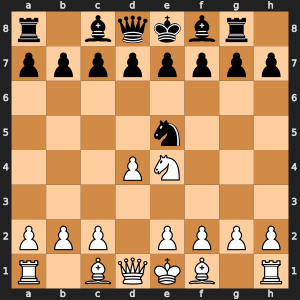

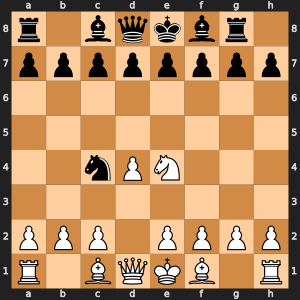


7]



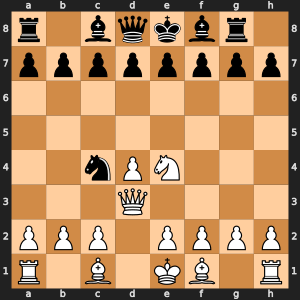

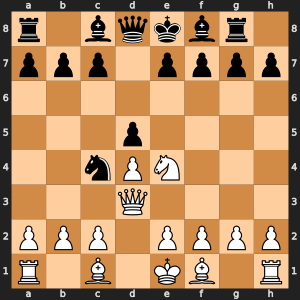


8]



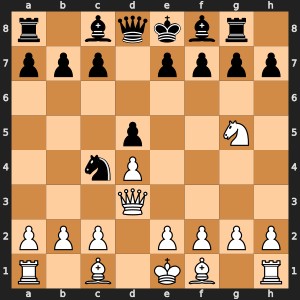

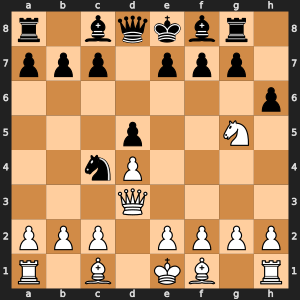


9]



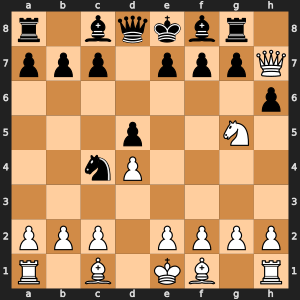

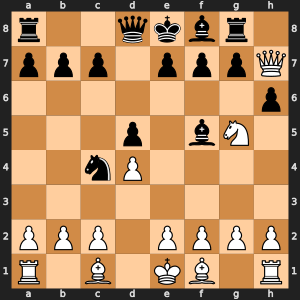


10]



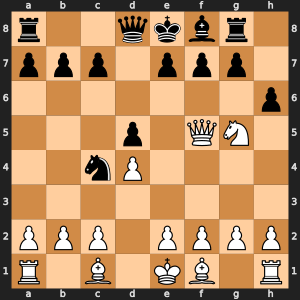

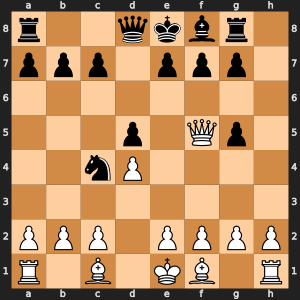


11]



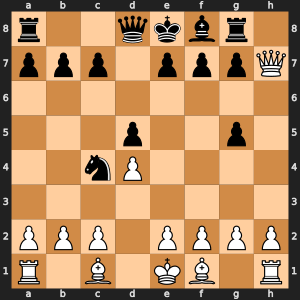

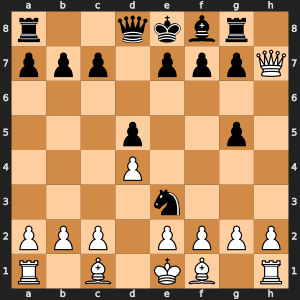


12]



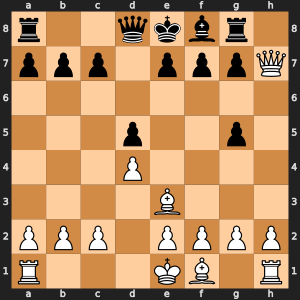

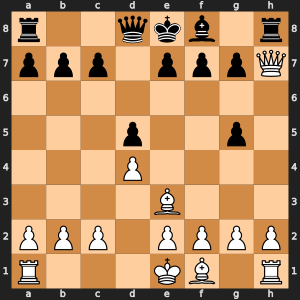


13]



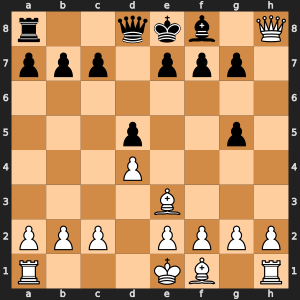

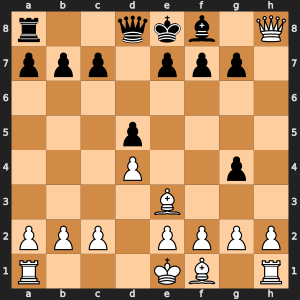


14]



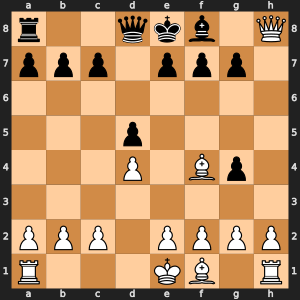

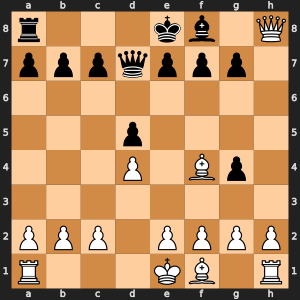


15]



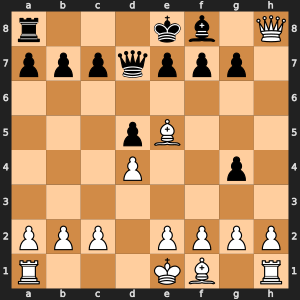

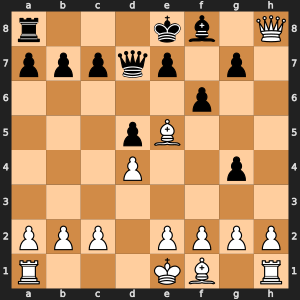


16]



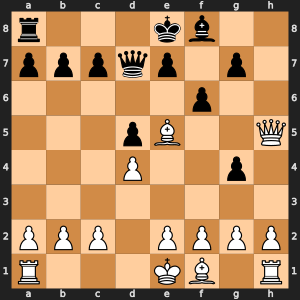

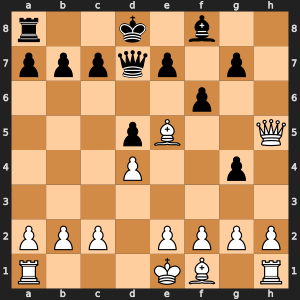


17]



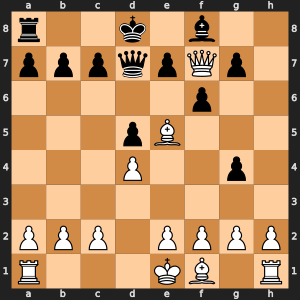

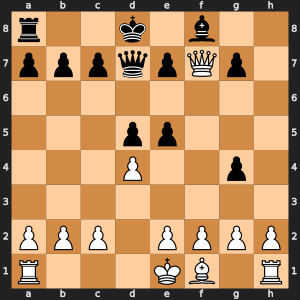


18]



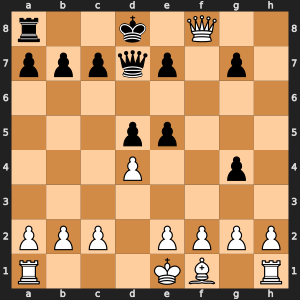

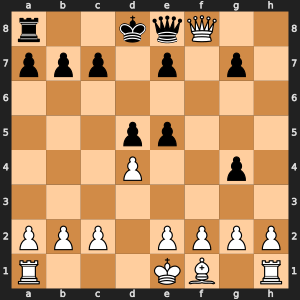


19]



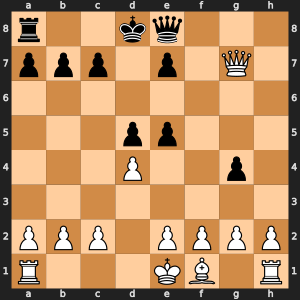

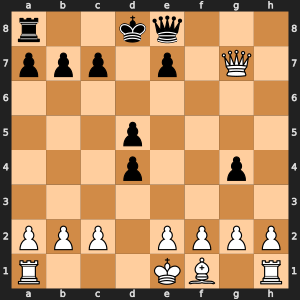


20]



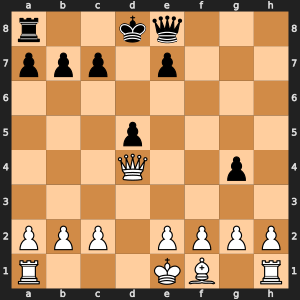

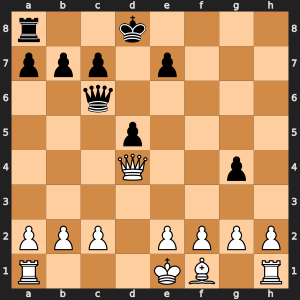


21]



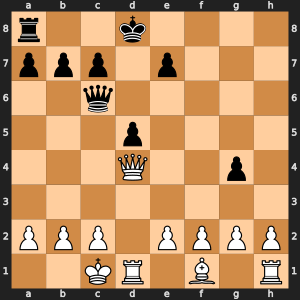

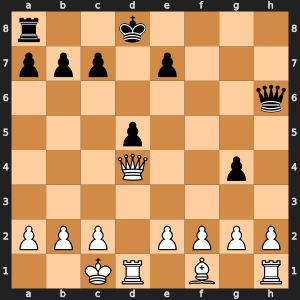


22]



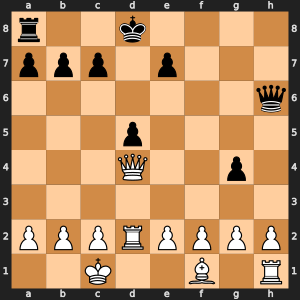

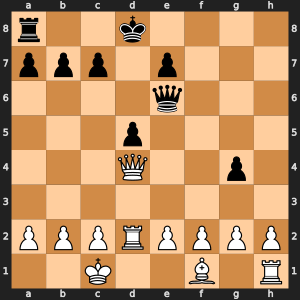


23]



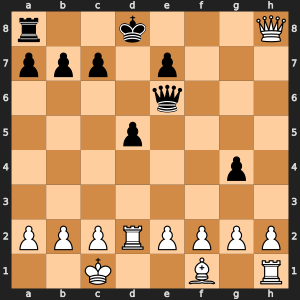

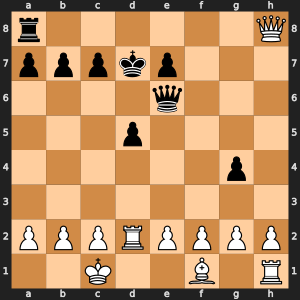


24]



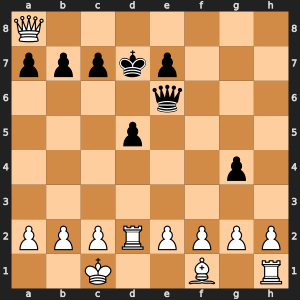

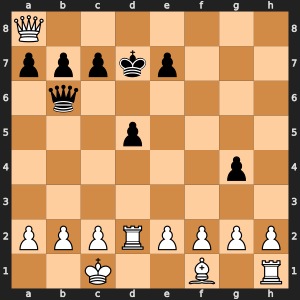


25]



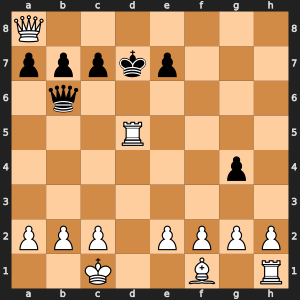

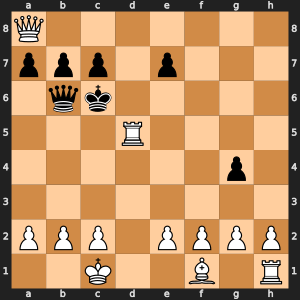


26]



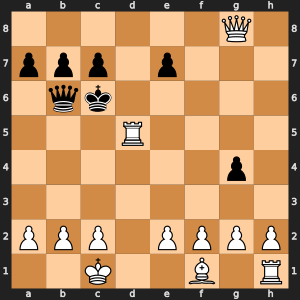

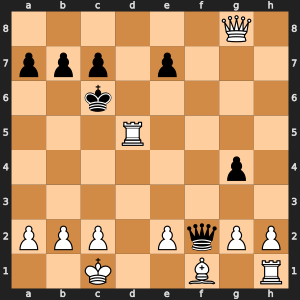


27]



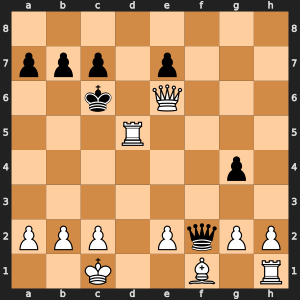


[Event "AI VS AI "]
[Site "DAA MIDSEM EVALUATION "]
[Date "2023-05-30"]
[Round "1"]
[White "AI"]
[Black "AI"]
[Result "1-0"]

1-0


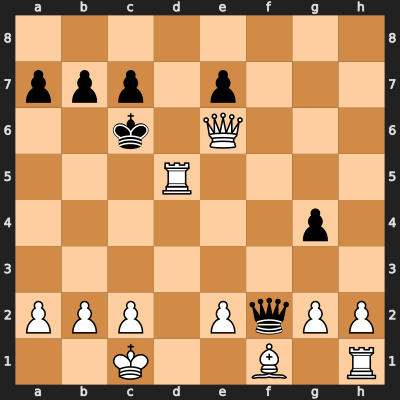

In [36]:
import datetime
from IPython.display import SVG, display
count = 0
movehistory = []
game = chess.pgn.Game()
board = chess.Board()
while not board.is_game_over():
    
    if board.turn:
        p=0
        count += 1
        print(f'\n{count}]\n')
        move = selectmove(4)
        if p==0:
          mv=move
          p=p+1
        board.push(move)
        display(SVG(chess.svg.board(board=board,size=300)))
        print()
    else:
        move = selectmove(2)
        board.push(move)
        display(SVG(chess.svg.board(board=board,size=300)))
game.add_line(movehistory)
game.headers["Event"] = "AI VS AI "
game.headers["Site"] = "DAA MIDSEM EVALUATION "
game.headers["Round"] = 1
game.headers["Date"] = str(datetime.datetime.now().date())
game.headers["White"] = "AI"
game.headers["Black"] = "AI"
game.headers["Result"] = str(board.result())
print(game)
SVG(chess.svg.board(board=board,size=400))

**MAKING AN INTERFACE**

In [37]:
# Remaining imports
import traceback
from flask import Flask, Response, request
import webbrowser
from flask import redirect


In [38]:
# Getting Ai's Move
def aimove():
    move = selectmove(3)
    board.push(move)

In [39]:
app = Flask(__name__)

In [40]:
# Main Page of the Flask Chess Web Page
@app.route("/")
def main():
    global count, board
    ret = '<html><head>'
    ret += '<style>'
    ret += 'input { font-size: 30px; }'
    ret += 'button { font-size: 30px; background-color: #4CAF50; color: white; border: none; padding: 10px; text-align: center; text-decoration: none; display: inline-block; transition-duration: 0.4s; cursor: pointer; }'
    ret += 'button:hover { background-color: #45a049; }'
    ret += 'h1 { font-size: 40px; color: #4CAF50; }'
    ret += 'img { width: 600px; height: 600px; border: 5px solid #4CAF50; }'
    ret += '</style>'
    ret += '</head><body>'
    ret += '<h1>{}</h1>'.format("White's Turn" if board.turn == chess.WHITE else "Black's Turn")
    ret += '<img width=600 height=600 src="/board.svg?%f"></img></br></br>' % time.time()
    ret += '<form action="/game/" method="post"><button name="New Game" type="submit">Load New Game</button></form>'
    ret += '<form action="/undo/" method="post"><button name="Undo" type="submit">Undo Last Move</button></form>'
    ret += '<form action="/move/"><input type="submit" value="Human Move:"><input name="move" type="text"></input></form>'
    ret += '<form action="/dev/" method="post"><button name="AI Move" type="submit">Make Ai Move</button></form>'
    ret += '<form action="/rules/" method="post"><button name="Chess Rules" type="submit">Show Chess rules</button></form>'
    return ret


In [41]:
# Display Board
@app.route("/board.svg/")
def board():
    return Response(chess.svg.board(board=board, size=700), mimetype='image/svg+xml')


In [42]:
# Making Ai’s Move
@app.route("/dev/", methods=['POST'])
def dev():
    try:
        aimove()
    except Exception:
        traceback.print_exc()
    return main()

In [43]:
#make human move
@app.route("/move/")
def move():
    try:
        move = request.args.get('move', default="")
        parsed_move = board.parse_san(move)
        board.push(parsed_move)
    except chess.IllegalMoveError:
        traceback.print_exc()
        return redirect("/error/")
    except Exception:
        traceback.print_exc()
    return main()

@app.route("/error/")
def error():
    ret = '<html><head>'
    ret += '</head><body>'
    ret += '<h1>Uh oh! You made an invalid move!</h1>'
    ret += '<p>Please make sure to enter a valid chess move.</p>'
    ret += '<h2>Chess Rules</h2>'
    ret += '<p>Here are the basic rules of chess:</p>'
    ret += '<ul>'
    ret += '<li>1. Each player starts with 16 pieces: one king, one queen, two rooks, two knights, two bishops, and eight pawns.</li>'
    ret += '<li>2. The goal is to checkmate the opponent\'s king, which means the king is in a position to be captured (in "check") and there is no legal move to remove it from capture (mate).</li>'
    ret += '<li>3. Pieces have their own movement rules: the king can move one square in any direction, the queen can move any number of squares diagonally, horizontally, or vertically, the rook can move any number of squares horizontally or vertically, the bishop can move any number of squares diagonally, and the knight moves in an L-shape: two squares in a horizontal or vertical direction, then one square in a perpendicular direction.</li>'
    ret += '<li>4. Pawns can move forward one square, but capture diagonally. They can also move two squares forward from their\n\n.</li>'
    ret += '</ul>'
    ret += '<form action="/back/" method="post"><button name="back" type="submit">back to main page</button></form>'
    ret += '</ul>'
    ret += '</body></html>'
    return ret








In [44]:
# initiate a New Game
@app.route("/game/", methods=['POST'])
def game():
    board.reset()
    return main()

In [45]:
# Show chess rules
@app.route("/rules/", methods=['POST'])
def rules():
    ret = '<html><head>'
    ret += '</head><body>'
    ret += '<h1>Chess Rules</h1>'
    ret += '<p>Here are the basic rules of chess:</p>'
    ret += '<ul>'
    ret += '<li>1. Each player starts with 16 pieces: one king, one queen, two rooks, two knights, two bishops, and eight pawns.</li>'
    ret += '<li>2. The goal is to checkmate the opponent\'s king, which means the king is in a position to be captured (in "check") and there is no legal move to remove it from capture (mate).</li>'
    ret += '<li>3. Pieces have their own movement rules: the king can move one square in any direction, the queen can move any number of squares diagonally, horizontally, or vertically, the rook can move any number of squares horizontally or vertically, the bishop can move any number of squares diagonally, and the knight moves in an L-shape: two squares in a horizontal or vertical direction, then one square in a perpendicular direction.</li>'
    ret += '<li>4. Pawns can move forward one square, but capture diagonally. They can also move two squares forward from their\n\n.</li>'
    ret += '</ul>'
    ret += '<form action="/back/" method="post"><button name="back" type="submit">back to main page</button></form>'
    ret += '</ul>'
    ret += '</body></html>'
    return ret





In [46]:
@app.route("/back/", methods=['POST'])
def back():
    return main()

In [47]:
# Undo
@app.route("/undo/", methods=['POST'])
def undo():
    try:
        board.pop()
    except Exception:
        traceback.print_exc()
    return main()

In [48]:
board = chess.Board()
webbrowser.open("http://127.0.0.1:5000/")
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [30/May/2023 10:34:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2023 10:34:13] "GET /board.svg?1685423052.587224 HTTP/1.1" 308 -
127.0.0.1 - - [30/May/2023 10:34:13] "GET /board.svg/?1685423052.587224 HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2023 10:34:13] "GET /favicon.ico HTTP/1.1" 404 -
